In [5]:
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()

In [6]:
df = 'BOLLYWOOD'

In [7]:
import pandas as pd

In [8]:
sf_df = my_session.sql("select * from {}".format(df))

In [9]:
import pandas as pd
bolly_df = sf_df.to_pandas()

In [10]:
bolly_df

,SLNO,RELEASEDATE,MOVIENAME,RELEASETIME,GENRE,BUDGET,BOXOFFICECOLLECTION,YOUTUBEVIEWS,YOUTUBELIKES,YOUTUBEDISLIKES
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [11]:
len(bolly_df)

149

In [12]:
bolly_df['GENRE'].value_counts()

GENRE
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64

In [13]:
pd.crosstab(bolly_df['GENRE'],bolly_df['RELEASETIME'])

RELEASETIME,FS,HS,LW,N
GENRE,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [14]:
# How many movies in each genre got released in different release times like long weekend, festive season, etc.
pd.crosstab(bolly_df['RELEASETIME'],bolly_df['GENRE'])

GENRE,Action,Comedy,Drama,Romance,Thriller
RELEASETIME,,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


In [19]:
# Which month of the year, maximum number movie releases are seen?
bolly_df = pd.DataFrame(bolly_df)

# Convert RELEASEDATE to datetime
bolly_df['RELEASEDATE'] = pd.to_datetime(bolly_df['RELEASEDATE'], errors='coerce')

# Extract month
bolly_df['MONTH'] = bolly_df['RELEASEDATE'].dt.month

In [21]:
bolly_df['MONTH'].value_counts()

MONTH
1     20
3     19
5     18
7     16
2     16
4     11
6     10
9     10
11    10
10     9
8      8
12     2
Name: count, dtype: int64

In [22]:
bolly_df

,SLNO,RELEASEDATE,MOVIENAME,RELEASETIME,GENRE,BUDGET,BOXOFFICECOLLECTION,YOUTUBEVIEWS,YOUTUBELIKES,YOUTUBEDISLIKES,MONTH
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7
...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,3
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3


In [23]:
# Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?
bolly_df[bolly_df['BUDGET'] >= 25]['MONTH'].value_counts()

MONTH
2     9
1     8
8     7
3     7
11    6
7     6
6     5
9     5
4     4
10    4
5     3
12    2
Name: count, dtype: int64

In [24]:
bolly_df['ROI'] = bolly_df['BOXOFFICECOLLECTION'] - bolly_df['BUDGET'] / bolly_df['BUDGET']

In [31]:
bolly_df.sort_values('ROI',ascending=False).head(10)

,SLNO,RELEASEDATE,MOVIENAME,RELEASETIME,GENRE,BUDGET,BOXOFFICECOLLECTION,YOUTUBEVIEWS,YOUTUBELIKES,YOUTUBEDISLIKES,MONTH,ROI
89,90,2014-12-19,PK,HS,Drama,85,735.0,13270623,43767,5693,12,734.0
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,8,394.0
26,27,2014-10-24,Happy New Year,LW,Drama,125,383.0,6395202,37585,10269,10,382.0
43,44,2014-07-25,Kick,N,Action,100,377.0,18986221,101275,10066,7,376.0
92,93,2014-10-02,Bang Bang,FS,Action,140,340.0,15889811,61805,6283,10,339.0
82,83,2013-05-31,Yeh Jawaani Hai Deewani,N,Romance,70,311.0,5123217,13826,1640,5,310.0
119,120,2013-11-01,Krrish 3,FS,Action,115,300.0,23171067,72070,11888,11,299.0
132,133,2013-09-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,9,297.0
78,79,2014-08-15,Singham Returns,LW,Action,90,200.0,8287587,20011,2899,8,199.0
101,102,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,7,163.0


In [32]:
# Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times
bolly_df.groupby('RELEASETIME')['ROI'].mean().reset_index()

,RELEASETIME,ROI
0,FS,88.535294
1,HS,73.619444
2,LW,97.322000
3,N,38.942828


In [34]:
!pip install seaborn

     |████████████████████████████████| 296kB 10.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sn

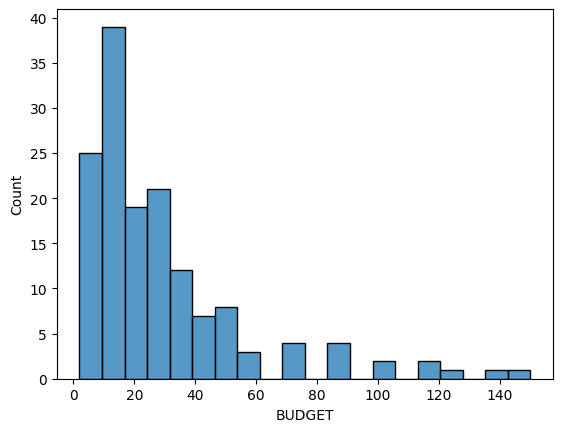

In [36]:
sn.histplot(bolly_df['BUDGET'],bins=20);

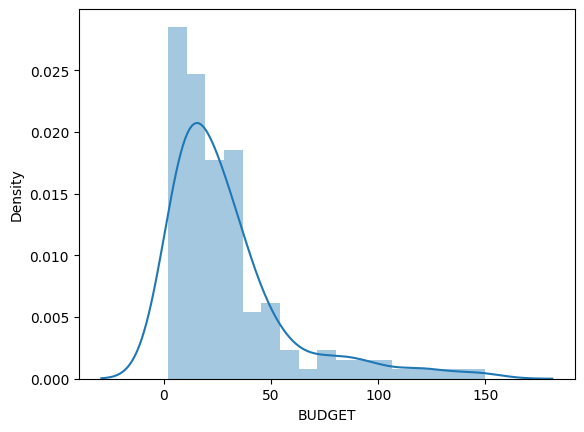

In [38]:
sn.distplot(bolly_df['BUDGET']);

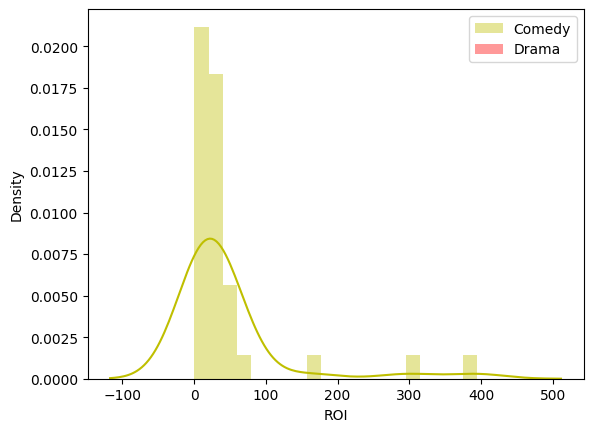

In [39]:
# Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?
sn.distplot(bolly_df[bolly_df['GENRE'] == 'Comedy']['ROI'],color='y',label="Comedy",bins=20);
sn.distplot(bolly_df[bolly_df['GENRE'] == ' Drama ']['ROI'],color='r',label="Drama",bins=20);

plt.legend();

In [41]:
#  Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?
bolly_df[['BOXOFFICECOLLECTION','YOUTUBELIKES']].corr()

,BOXOFFICECOLLECTION,YOUTUBELIKES
BOXOFFICECOLLECTION,1.000000,0.682517
YOUTUBELIKES,0.682517,1.000000


In [51]:
# Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare
bolly_df.groupby('GENRE')['YOUTUBELIKES'].sum().reset_index()

,GENRE,YOUTUBELIKES
0,Action,401873
1,Comedy,172250
2,Drama,279077
3,Romance,177241
4,Thriller,143312


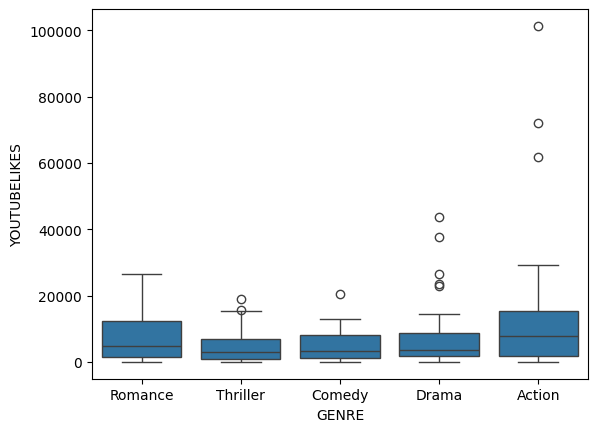

In [52]:
#  Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.
sn.boxplot(x='GENRE',y='YOUTUBELIKES',data=bolly_df);

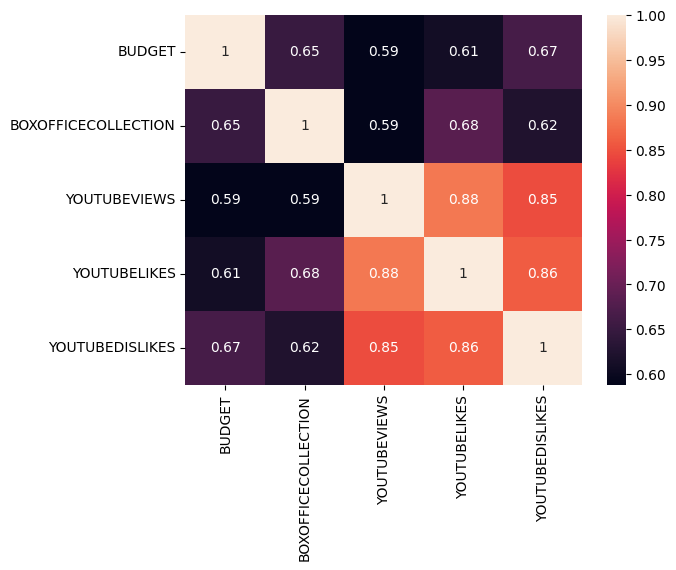

In [53]:
# Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.
feature_corre = ['BUDGET','BOXOFFICECOLLECTION','YOUTUBEVIEWS','YOUTUBELIKES','YOUTUBEDISLIKES']
sn.heatmap(bolly_df[feature_corre].corr(),annot=True);

In [54]:
influential_features = ['BUDGET','BOXOFFICECOLLECTION','YOUTUBEVIEWS','YOUTUBELIKES','YOUTUBEDISLIKES']

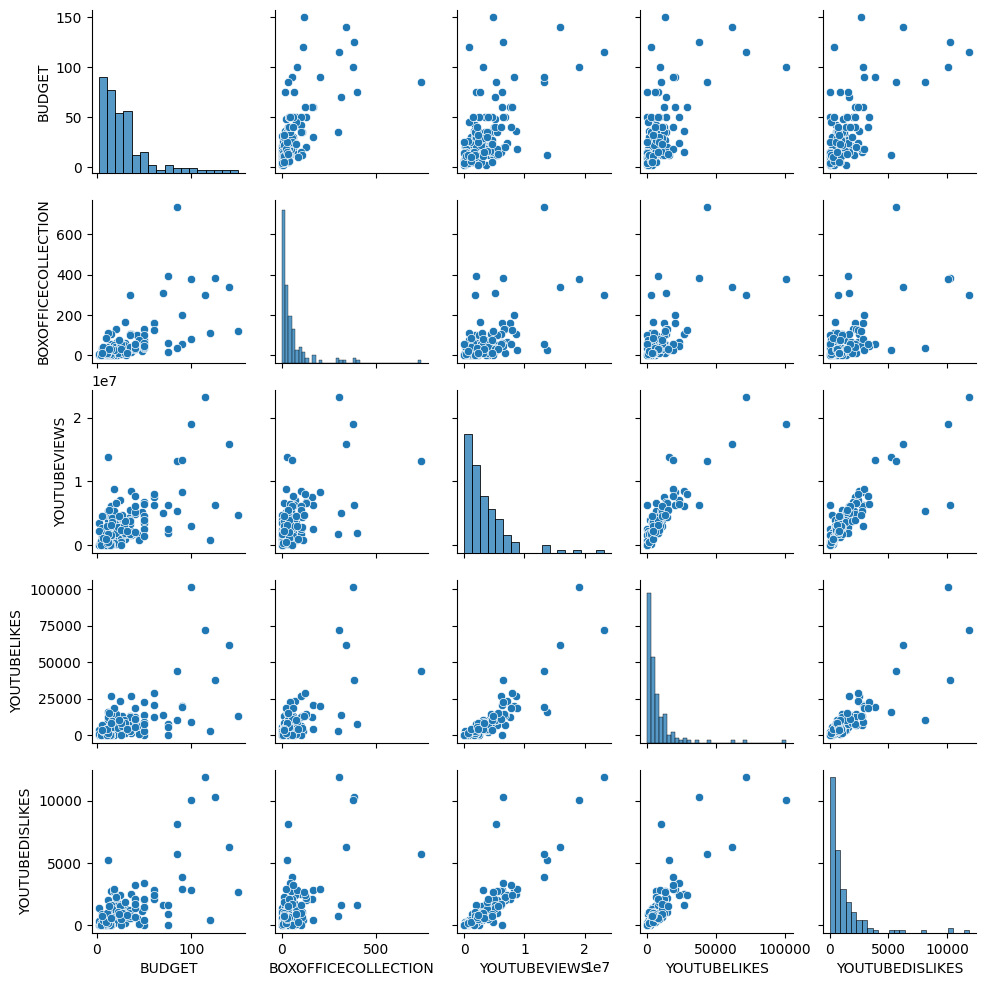

In [55]:
sn.pairplot(bolly_df[influential_features], size=2)